### 1. Image Data Loading Using Numpy&PyTorch

 - Color image: image have 3 color chanels


In [1]:
import urllib.request as req
from PIL import Image 
import matplotlib.pyplot as plt

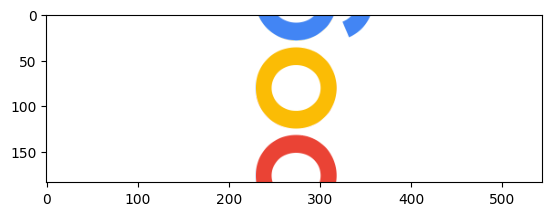

In [8]:
#download an image 
# req.urlretrieve("https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png", "google.png")
img = Image.open("/home/nhatthuong/Documents/ResearchVQA-VQG-firstpaper/AIO/img/google.png")
img = img.rotate(90)
plt.imshow(img)

### 2. Softmax+Normalization for Fashion-MNIST

In [44]:
import numpy as np
import gzip
from urllib import request
import matplotlib.pyplot as plt
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch


#### 2.1 Download data MNIST

In [ ]:
filenames = ["train-images-idx3-ubyte.gz", 
             "train-labels-idx1-ubyte.gz", 
             "t10k-images-idx3-ubyte.gz", 
             "t10k-labels-idx1-ubyte.gz"]

folder = '/home/nhatthuong/Documents/ResearchVQA-VQG-firstpaper/AIO/Dataset/data_fashion_mnist/'
base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
for name in filenames:
    print("Downloading " + name + "...")
    request.urlretrieve(base_url + name, folder + name) 

In [14]:
with gzip.open(folder + "train-images-idx3-ubyte.gz", "rb") as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open(folder + "train-labels-idx1-ubyte.gz", "rb") as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(folder + "t10k-images-idx3-ubyte.gz", "rb") as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open(folder + "t10k-labels-idx1-ubyte.gz", "rb") as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

[11268, 38872, 42550, 33359, 13866, 40503, 12062, 587, 17473, 22872, 59485, 51996, 23528, 25697, 44379, 49460, 2465, 34781, 15071, 38010, 9987, 5634, 33219, 59456, 9172, 16429, 6500, 40253, 49736, 28898, 14525, 45029, 16208, 39071, 20200, 34163, 35315, 37414, 58480, 49606, 26789, 52456, 54271, 48148, 42179, 58834, 51050, 843, 12109, 3290, 25960, 3545, 44438, 9422, 28504, 36069, 41627, 17084, 51542, 22922, 10880, 32785, 49331, 57969, 9174, 51657, 33689, 8844, 18562, 21513, 2438, 48916, 13723, 35083, 49514, 22377, 44718, 27664, 53651, 24034, 36161, 47115, 13632, 57083, 21511, 2552, 39184, 45792, 24252, 55932, 28510, 4725, 42960, 24069, 53315, 6741, 57811, 50060, 34227, 12035, 2707, 18298, 55794, 24533, 31190, 3189, 51000, 18266, 57486, 52187, 29426, 1159, 46739, 31157, 18948, 52150, 6919, 34413, 32561, 59568, 55698, 21953, 4788, 50314, 625, 27927, 34478, 34557, 13216, 12331, 15569, 19370, 25609, 59255, 54083, 9495, 23516, 12340, 16978, 539, 37821, 6472, 14907, 21882]
60000


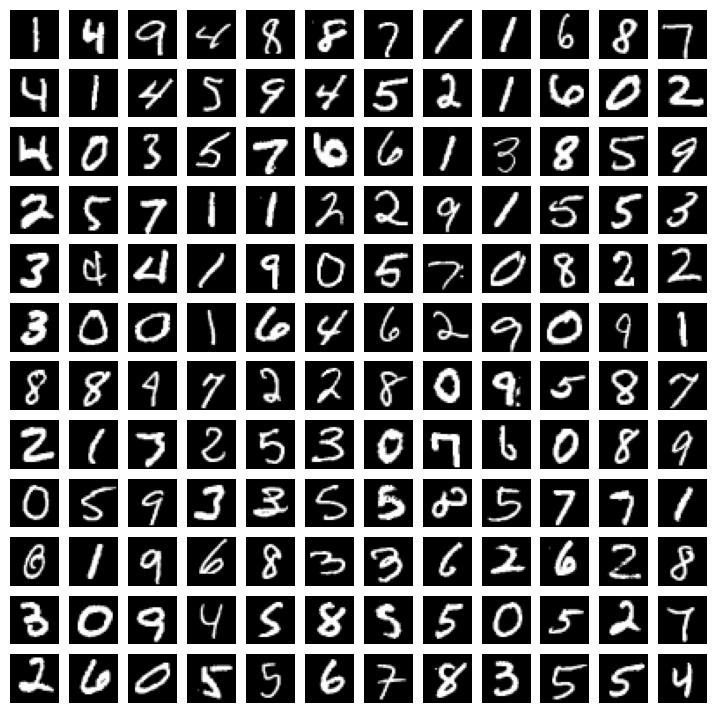

In [10]:
indices = list(np.random.randint(X_train.shape[0], size=144))
print(indices)
print(X_train.shape[0])
fig = plt.figure(figsize=(9, 9))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

#### 2.2 Fashion MNIST with Pytorch

In [20]:
trainset = FashionMNIST(root='data', train=True, download=True)

100%|██████████| 26421880/26421880 [01:52<00:00, 234485.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 97343.38it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [09:40<00:00, 7615.01it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:01<00:00, 3594.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [31]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data', train=True, download=False, transform=transform)
img, label = trainset[0]
print(type(img), label)

<class 'torch.Tensor'> 9


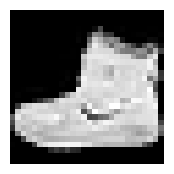

In [35]:
img, _ = trainset[0]
np_img = img.numpy()
np_img = np.transpose(np_img, (1, 2, 0)) # HWC
plt.figure(figsize=(2, 2))
plt.imshow(np_img, cmap='gray')
plt.axis('off')
plt.show()

#### 2.3 Divide Batch Data

In [32]:
transform = transforms.Compose([transforms.ToTensor()])
trainloader = DataLoader(trainset, 
                         batch_size=1024,  #batch size with 1024 samples
                         num_workers = 2,  #using 2 worker for loading data
                         shuffle=True    #shuffle data
                         )

In [37]:
for i, (inputs, labels) in enumerate(trainloader, 0): # 0 is the starting index
    print(f'Batch index {i} -- {inputs.shape} -- {labels.shape}')

Batch index 0 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 1 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 2 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 3 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 4 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 5 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 6 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 7 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 8 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 9 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 10 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 11 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 12 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 13 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 14 -- torch.Size([

#### 2.4 Implement Load data, transform, divide batch

In [4]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

/home/nhatthuong/.miniconda3/envs/env_vqa/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data', train=True, transform=transform, download=False)
dataloader =  DataLoader(trainset, batch_size=30000, shuffle=True)
for i, (inputs, labels) in enumerate(dataloader, 0):
    print(f'Batch index {i} -- {inputs.shape} -- {labels.shape}')

Batch index 0 -- torch.Size([30000, 1, 28, 28]) -- torch.Size([30000])
Batch index 1 -- torch.Size([30000, 1, 28, 28]) -- torch.Size([30000])


#### 2.5 Implement with softmax

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(torch.flatten)])   
trainset = FashionMNIST(root='data', train=True, transform=transform, download=False)


### 3. MLP and Example

In [22]:
import torch.nn as nn
import torch
import torch.optim as optim

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [9]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 10)
)

model = model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [14]:
input_tensor = torch.rand(5,1,28,28).to(device)

In [15]:
output = model(input_tensor)

In [17]:
print(output)

tensor([[ 0.8260, -0.4944, -0.5597,  0.6051,  0.0015,  0.0684, -0.1112,  0.2712,
         -0.1876,  0.0492],
        [ 0.1918, -0.2387, -0.3838,  0.2040,  0.1209,  0.0328,  0.2949,  0.0603,
         -0.2233, -0.0468],
        [ 0.3398, -0.3075, -0.2485,  0.1778, -0.2282,  0.3279, -0.0470, -0.1109,
         -0.1401,  0.0321],
        [ 0.8732, -0.3794, -0.4056,  0.0565, -0.1009, -0.0210,  0.1396,  0.0943,
         -0.3934,  0.1093],
        [ 0.5193, -0.4343, -0.3360,  0.2152, -0.1024,  0.0121,  0.1325, -0.0733,
          0.0083,  0.2821]], device='cuda:0', grad_fn=<AddmmBackward0>)


### 4. Step by Step Implement

In [32]:
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [52]:
max_epoch = 400
loss_arr = []
for epoch in range(max_epoch):
    correct = 0
    for i, (input, labels) in enumerate(dataloader, 0):
        input, labels = input.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        output = model(input)
        loss = criterion(output, labels)
        
        _, predicted = torch.max(output.data, 1)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
    loss_arr.append(loss.item())
    print(f'epochs {epoch}: loss - {loss}')

epochs 0: loss - 0.8010331392288208
epochs 1: loss - 0.7986777424812317
epochs 2: loss - 0.8020148873329163
epochs 3: loss - 0.7955124378204346
epochs 4: loss - 0.7981774210929871
epochs 5: loss - 0.8028639554977417
epochs 6: loss - 0.7952197194099426
epochs 7: loss - 0.79738450050354
epochs 8: loss - 0.8001277446746826
epochs 9: loss - 0.7979060411453247
epochs 10: loss - 0.7946539521217346
epochs 11: loss - 0.7998642325401306
epochs 12: loss - 0.799480140209198
epochs 13: loss - 0.7958322763442993
epochs 14: loss - 0.8033678531646729
epochs 15: loss - 0.7995433807373047
epochs 16: loss - 0.8026458621025085
epochs 17: loss - 0.7928447127342224
epochs 18: loss - 0.7975572943687439
epochs 19: loss - 0.7936787009239197
epochs 20: loss - 0.7955418825149536
epochs 21: loss - 0.8007537126541138
epochs 22: loss - 0.7945463061332703
epochs 23: loss - 0.794495701789856
epochs 24: loss - 0.7955586314201355
epochs 25: loss - 0.7953584790229797
epochs 26: loss - 0.7963588833808899
epochs 27: loss

[1.86882746219635, 1.8328540325164795, 1.8100007772445679, 1.7848050594329834, 1.7708784341812134, 1.7700254917144775, 1.7453171014785767, 1.7153146266937256, 1.6908987760543823, 1.6626538038253784, 1.684502363204956, 1.6431548595428467, 1.6735355854034424, 1.6138288974761963, 1.5644961595535278, 1.619622826576233, 1.599938988685608, 1.5719192028045654, 1.5641134977340698, 1.5495692491531372, 1.5186834335327148, 1.507497787475586, 1.529146432876587, 1.507502555847168, 1.4448516368865967, 1.4707530736923218, 1.4824186563491821, 1.4410066604614258, 1.4215753078460693, 1.3880764245986938, 1.361635684967041, 1.3867179155349731, 1.400141716003418, 1.4078425168991089, 1.3585193157196045, 1.3748633861541748, 1.3749895095825195, 1.3704825639724731, 1.3429796695709229, 1.3040378093719482, 1.3490700721740723, 1.3146662712097168, 1.3239775896072388, 1.3225791454315186, 1.3414384126663208, 1.2971947193145752, 1.3253902196884155, 1.2271521091461182, 1.2419968843460083, 1.254639744758606, 1.22594547

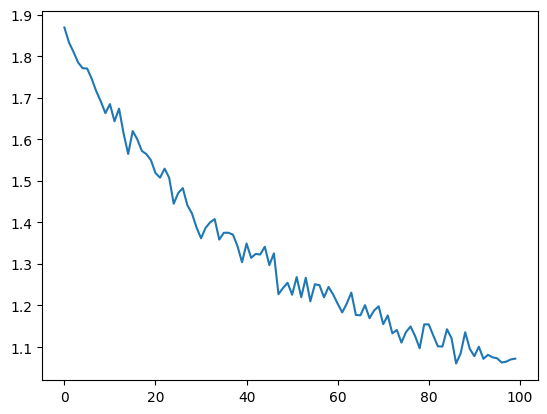

In [45]:
import matplotlib.pyplot as plt
values = [t.item() for t in loss_arr]
print(values)
arr = [1, 4, 2, 7, 5, 9, 3]

plt.plot(values)
plt.show()

### 5. Training Strategy (option)